# Laplace approximation for the bioassay posterior (6p)

Laplace approximation: derive the analytic form of the information matrix and the normal approximation covariance for the bioassay example.

 * Derive analytically the gradient and the Hessian of the log-posterior function $f(\alpha,\beta) =
\log(p(\alpha, \beta | y, n, x))$

The unnormalized posterior is

$$ p(\alpha,\beta | y,n,x) \propto p(\alpha,\beta)p(y | \alpha,\beta,n,x) $$

where the prior is uniform $p(\alpha, \beta) \propto 1$ and the likelihood is given by (page 75 in BDA3)

$$
p(y | \alpha,\beta, n, x) = 
\prod_{i=1}^4
\left[
\text{logit}^{-1}(\alpha + \beta x_i)
\right]^{y_i}
\left[
1 - \text{logit}^{-1}(\alpha + \beta x_i)
\right]^{n_i - y_i}
$$

$$
p(y | \alpha, \beta, n, x) = 
\prod_{i=1}^4
\left[
\frac{e^{\phi_i}}{1+e^{\phi_i}}
\right]^{y_i}
\left[
\frac{1}{1+e^{\phi_i}}
\right]^{n_i - y_i}
$$

where we have defined an auxiliary variable $\phi_i = \alpha + \beta x_i$. The data $x, y, n$ are given in the table 3.1 on page 74. Note that the normalizing constant does not depend on $\alpha$ or $\beta$, so the corresponding terms disappear after taking the logarithm of (1) and differentiating with respect to $\alpha$ or $\beta$.

We're interested in the gradient and hessian of the log posterior. Taking the log.

$$
f(\alpha, \beta) \propto 
\sum_{i=1}^4
y_i\phi_i -
n_i\log(1+e^{\phi_i})
$$

Taking the derivative w.r.t. $\alpha$

$$
\frac{df(\alpha, \beta)}{d\alpha} = 
\frac{df(\alpha, \beta)}{d\phi}\frac{d\phi}{d\alpha} =
\left[
\sum_{i=1}^4
y_i -
n_i
\frac{1}{1+e^{-\phi_i}}
\right]
\frac{d\phi}{d\alpha} 
$$

Evaluating

$$
\frac{df(\alpha, \beta)}{d\alpha} =
\sum_{i=1}^4
y_i - 
n_i\frac{1}{1+e^{-\phi_i}}
$$

Similarly for $\beta$

$$
\frac{df(\alpha, \beta)}{d\beta} =
\frac{df(\alpha, \beta)}{d\phi}\frac{d\phi}{d\beta} =
\left[
\sum_{i=1}^4
y_i - 
n_i\frac{1}{1+e^{-\phi_i}}
\right]
\frac{d\phi}{d\beta}
$$

Evaluating

$$
\frac{df(\alpha, \beta)}{d\beta} =
\sum_{i=1}^4
x_i
\left[
y_i - 
n_i\frac{1}{1+e^{-\phi_i}}
\right]
$$

Which gives us the last part of the gradient.

It's usefull at this point to recognize the function

$$
z(\phi) = \frac{1}{1+e^{-\phi}}
$$

As the sigmoid function, and recall that it has the useful property that

$$
\frac{dz}{d\phi} = (1-z(\phi))z(\phi)
$$

Now for the hessian terms, making heavy use of the property mentioned above.

$$
\frac{d^2f(\alpha, \beta)}{d\alpha^2} =
\frac{ddf(\alpha, \beta)}{d\alpha d\phi}\frac{d\phi}{d\alpha} =
\left[
-\sum_{i=1}^4
n_i
(1-z(\phi))z(\phi)
\right]
\frac{d\phi}{d\alpha}
$$

$$
\frac{d^2f(\alpha, \beta)}{d\alpha^2} =
-\sum_{i=1}^4
n_i
(1-z(\phi))z(\phi)
$$

$$
\frac{d^2f(\alpha, \beta)}{d\alpha d\beta} =
\frac{ddf(\alpha, \beta)}{d\alpha d\phi}\frac{d\phi}{d\beta} =
\left[
-\sum_{i=1}^4
n_i
(1-z(\phi))z(\phi)
\right]
\frac{d\phi}{d\beta}
$$

$$
\frac{d^2f(\alpha, \beta)}{d\alpha d\beta} =
-\sum_{i=1}^4
x_i
n_i
(1-z(\phi))z(\phi)
$$

$$
\frac{d^2f(\alpha, \beta)}{d\beta^2} =
\frac{ddf(\alpha, \beta)}{d\beta d\phi}\frac{d\phi}{d\beta} =
\left[
-
\sum_{i=1}^4
x_i
n_i
(1-z(\phi))z(\phi)
\right]
\frac{d\phi}{d\beta}
$$

$$
\frac{d^2f(\alpha, \beta)}{d\beta^2} =
-
\sum_{i=1}^4
x_i^2
n_i
(1-z(\phi))z(\phi)
$$

* Implement a function [e,g,H] = bioassayfun(w,x,y,n) so that it returns the value e, the gradient g and the Hessian H of the negative log-posterior evaluated at w = ($\alpha$, $\beta$). g and H are the negatives of the gradient and Hessian of the log-posterior (2).

$$
f(\alpha, \beta) \propto 
\sum_{i=1}^4
y_i\phi_i -
n_i\log(1+e^{\phi_i})
$$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.rc('figure', figsize=(8, 6))
plt.rc('font', size=18)
plt.set_cmap(plt.get_cmap('viridis'))

x = np.array([-.86, -.30, -.05, .73])
n = np.array([5., 5., 5., 5.])
y = np.array([0., 1., 3., 5.])

def bioassayfun(w):
    alpha = w[0]
    beta = w[1]
    phi = alpha + beta * x
    lp = np.sum(y * phi - n * np.log(1 + np.exp(phi)))
    
    # Gradient terms
    z = 1.0 / (1.0 + np.exp(-phi))
    df_dphi = y - n * z
    df_da = np.sum(df_dphi)
    df_db = np.sum(df_dphi * x)
    
    # Hessian terms
    dz_dphi = (1 - z) * z
    df_daa = -np.sum(n * dz_dphi)
    df_dab = -np.sum(x * n * dz_dphi)
    df_dbb = -np.sum(x ** 2 * n * dz_dphi)
    
    return (-lp, -np.array([df_da, df_db]), -np.array([[df_daa, df_dab],[df_dab, df_dbb]]))

In [2]:
e,g,H = bioassayfun((2, 2))
print e
print g
print H

15.5683272996
[ 7.05574802 -3.5310204 ]
[[ 2.73285984 -1.21269097]
 [-1.21269097  1.05815555]]


* Find the mode $\hat{w}  = (\hat{\alpha} ,\hat{\beta})$ of the log-posterior (minimum of the negative log-posterior) using Newton’s method:

$$
w_{n+1} = w_n − H(w_n)^{−1} g(w_n)
$$

where $H(w_n)$ and $g(w_n)$ are the Hessian and the gradient evaluated at $w_n$. Use any suitable starting point $w_0$, such as the origin or some random point.

In [3]:
def newton_min(f, x, max_iters, eps=1e-10):
    """
    Minimize f using newtons method. f(x) must return (e, g, H) where 
    e is the value, H is the hessian and g is the gradient of f in point x.
    
    Runs for a maximum of max_iters iterations or until the absolute value
    of all gradients are below eps.
    
    returns (x, e, g, H); The found minimum and e, g, H evaluated in that minimum.
    """
    
    for i in range(max_iters):
        e, g, H = f(x)
        if(np.all(np.abs(g) < eps)):
            break
            
        x = x - np.dot(np.linalg.inv(H), g)
    
    return (x, e, g, H)

In [4]:
x_hat, e_hat, g_hat, H_hat = newton_min(bioassayfun, (0,0), 10)
print "Mode: %s" % x_hat
print "Value at mode: %f" % e_hat
print "Gradients at mode:\n %s" % g_hat
print "Hessian at mode:\n %s" % H_hat

Mode: [ 0.84658023  7.74881715]
Value at mode: 5.894442
Gradients at mode:
 [ -1.13797860e-15  -1.27588912e-15]
Hessian at mode:
 [[ 1.96476869 -0.29342501]
 [-0.29342501  0.0859372 ]]


In [5]:
cov = np.linalg.inv(H_hat)
print "Normal approximation covariance matrix:\n %s" % cov

Normal approximation covariance matrix:
 [[  1.03853509   3.54598682]
 [  3.54598682  23.74386507]]


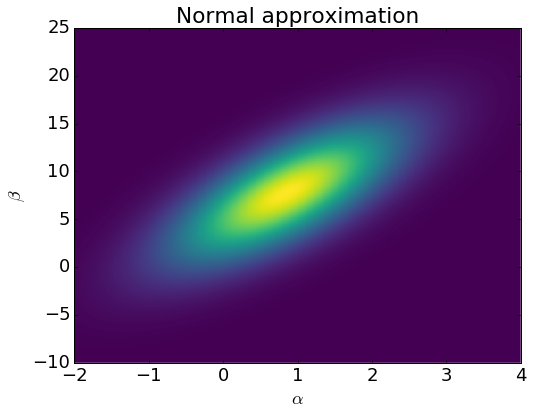

In [6]:
ngrid = 500
A = np.linspace(-2, 4, ngrid)
B = np.linspace(-10, 25, ngrid)
A_broadcasted = np.lib.stride_tricks.as_strided(A, shape=(ngrid,ngrid), strides=(0,A.strides[0]))
B_broadcasted = np.lib.stride_tricks.as_strided(B, shape=(ngrid,ngrid), strides=(B.strides[0],0))
grid = np.dstack((A_broadcasted, B_broadcasted))
pdf = stats.multivariate_normal.pdf(x=grid, mean=x_hat, cov=cov)
plt.imshow(pdf, interpolation="None", origin='lower', aspect='auto', extent=(A[0], A[-1], B[0], B[-1]))
plt.xlim([A[0], A[-1]])
plt.ylim([B[0], B[-1]])
_=plt.title('Normal approximation')
_=plt.xlabel(r'$\alpha$')
_=plt.ylabel(r'$\beta$')